## КМ5

Написать класс для игры в кости. Обеспечить случайное бросание кости (случайным образом
выкидывается от одного до шести очков). 10000 раз случайным образом кидаются десять
костей. Вычислить суммы очков десяти костей. Вычислить среднее значение числа очков,
среднее квадратичное отклонение, частоту появления раскладов с числом очков больших и
равных 25.

Сумма всех очков: 349881
Среднее значение: 34.9881
Среднеквадратичное отклонение: 5.351525228589223
Частота появления раскладов с 35 и больше очков: 0.5367


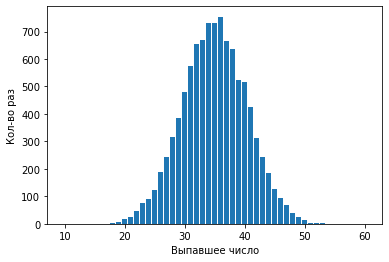

In [14]:
from random import randint
import matplotlib.pyplot as plt
 
class Dice:
    def roll(self):
        return randint(1, 6)
 
 
class Game:
    def __init__(self, dices, games, q=25):
        self.dices = [Dice() for _ in range(dices)]
        self.games = games
        self.q = q
 
    def __call__(self, dices, games, q=25):
        if dices != len(self.dices):
            self.dices = [Dice() for _ in range(dices)]
        if games != self.games:
            self.games = games
        if q != self.q:
            self.q = q
        return self.play()

    def __str__(self):
        res = ''
        for key in self.rolls:
            res += f'Бросок {key}: {self.rolls[key]}\n'
        return res[:-1]

    def __repr__(self):
        return self.__str__()

    def play(self):
        scores = {dice_dots: 0 for dice_dots in range(1 * len(self.dices), 6 * len(self.dices) + 1)}
        self.rolls = dict()
        for i in range(1, self.games+1):
            s = sum(map(lambda x: x.roll(), self.dices))
            self.rolls[i] = s
            scores[s] += 1
        self.res = [scores[dice_dots] for dice_dots in range(1 * len(self.dices), 6 * len(self.dices) + 1)]
        return self.res

    def draw(self):
        index = list(range(len(self.dices), 6 * len(self.dices) + 1))
        values = self.res
        s, avg, sigma, freq = self.calculate()
        print(f'Сумма всех очков: {s}\nСреднее значение: {avg}\nСреднеквадратичное отклонение: {sigma}\n\
Частота появления раскладов с {self.q} и больше очков: {freq}')
        plt.bar(index,values)
        plt.xlabel('Выпавшее число')
        plt.ylabel('Кол-во раз')
        plt.show()


    def calculate(self):
        s = sum(self.rolls.values())
        avg = s/self.games
        sigma = ((sum([(i-avg)**2 for i in self.rolls.values()]))/(self.games-1))**.5
        count = 0
        for i in self.rolls.values():
            if i >= self.q:
                count += 1
        freq = count/self.games
        return s, avg, sigma, freq



game = Game(10, 10000, 60)
game(10, 10000, 35)
game.draw()